In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from datetime import datetime
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import platform
from matplotlib import font_manager, rc

path = 'c:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Darwin' :
    rc('font', family = 'AppleeGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~')

In [53]:
seoul_covid = pd.read_excel('../data/서울확진자.xlsx')

In [54]:
seoul_covid.drop(['확진일'], axis = 1, inplace = True)
seoul_covid.rename(columns = {'확진' : '확진일'}, inplace = True)

In [55]:
for i in range(len(seoul_covid['확진일'])) :
    if len(str(seoul_covid['확진일'][i])) == 4 :
        seoul_covid['확진일'][i] = str(seoul_covid['확진일'][i])[0] + '월 ' + str(seoul_covid['확진일'][i])[-2:] + '일'
           
    elif len(str(seoul_covid['확진일'][i])) == 3 :
        seoul_covid['확진일'][i] = str(seoul_covid['확진일'][i])[0] + '월 ' + str(seoul_covid['확진일'][i])[-1] + '일'

In [56]:
seoul_covid['수'] = 1

In [57]:
data_seoul = pd.pivot_table(seoul_covid, index = ['확진일'], values = ['수'], aggfunc = 'sum')
data_seoul.reset_index(inplace = True)

In [58]:
seoul2 = data_seoul[[data_seoul['확진일'][i][0] == str(2) for i in range(len(data_seoul))]]
seoul3 = data_seoul[[data_seoul['확진일'][i][0] == str(3) for i in range(len(data_seoul))]]
seoul4 = data_seoul[[data_seoul['확진일'][i][0] == str(4) for i in range(len(data_seoul))]]
seoul5 = data_seoul[[data_seoul['확진일'][i][0] == str(5) for i in range(len(data_seoul))]]

In [59]:
new_df = pd.concat([seoul2, seoul3, seoul4, seoul5], axis = 0)
new_df.reset_index(drop = True, inplace =True)
new_df['확진일'] = '2020년 ' + new_df['확진일']

In [60]:
date_confirm = []
date_confirm = new_df['확진일'].apply(lambda x: datetime.strptime(x, '%Y년 %m월 %d일'))

In [61]:
new_df['확진일'] = date_confirm
new_df = new_df.sort_values(by = '확진일')
new_df.reset_index(drop = True, inplace = True)

In [62]:
new_df.head(1)

,확진일,수
0,2020-02-02,1


In [63]:
new_df.describe()

,수
count,98.000000
mean,8.724490
std,7.649244
min,1.000000
25%,3.000000
50%,6.500000
75%,13.000000
max,46.000000


In [64]:
date = pd.date_range('20200201', periods = 121)
date = pd.DataFrame(date)
date['수'] = 0
date.rename(columns = {0 : '확진일'}, inplace = True)

In [65]:
covid_seoul = pd.merge(date, new_df, on = '확진일', how = 'left')
covid_seoul = covid_seoul[['확진일', '수_y']]
covid_seoul = covid_seoul.fillna(0)
covid_seoul.rename(columns = {'수_y' : '확진자수'}, inplace = True)

In [66]:
covid_seoul['위험정도'] = 0

for i in range(len(covid_seoul)) :
    if covid_seoul['확진자수'][i] <= 3 :
        covid_seoul['위험정도'][i] = '주의'
    elif covid_seoul['확진자수'][i] <= 6 :
        covid_seoul['위험정도'][i] = '경계'
    elif covid_seoul['확진자수'][i] <= 13 :
        covid_seoul['위험정도'][i] = '위험'
    else :
        covid_seoul['위험정도'][i] = '심각'

In [67]:
covid_seoul

,확진일,확진자수,위험정도
0,2020-02-01,0.0,주의
1,2020-02-02,1.0,주의
2,2020-02-03,0.0,주의
3,2020-02-04,0.0,주의
4,2020-02-05,2.0,주의
...,...,...,...
117,2020-05-27,25.0,심각
118,2020-05-28,19.0,심각
119,2020-05-29,9.0,위험
120,2020-05-30,6.0,경계


In [68]:
dagu_covid = pd.read_excel('../data/대구확진자.xlsx', header = None)

In [69]:
dagu_covid.rename(columns = {0 : '확진일', 1 : '확진자수'}, inplace = True)

In [70]:
dagu_covid_not0 = dagu_covid[dagu_covid['확진자수'] != 0]
dagu_covid_not0.describe()

,확진자수
count,87.000000
mean,79.298851
std,146.539471
min,1.000000
25%,2.000000
50%,14.000000
75%,65.500000
max,741.000000


In [71]:
covid_dagu = dagu_covid.copy()

In [72]:
covid_dagu['위험정도'] = 0

for i in range(len(covid_dagu)) :
    if covid_dagu['확진자수'][i] <= 3 :
        covid_dagu['위험정도'][i] = '주의'
    elif covid_dagu['확진자수'][i] <= 6 :
        covid_dagu['위험정도'][i] = '경계'
    elif covid_dagu['확진자수'][i] <= 13 :
        covid_dagu['위험정도'][i] = '위험'
    else :
        covid_dagu['위험정도'][i] = '심각'

In [73]:
covid_dagu

,확진일,확진자수,위험정도
0,2020-02-01,0,주의
1,2020-02-02,0,주의
2,2020-02-03,0,주의
3,2020-02-04,0,주의
4,2020-02-05,0,주의
...,...,...,...
116,2020-05-27,3,주의
117,2020-05-28,2,주의
118,2020-05-29,0,주의
119,2020-05-30,2,주의


### 물류데이터

In [74]:
df = pd.read_excel('../data/물류_호재.xlsx')
df.head()

,상품종류,날짜,동이름,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,0,190201,대구광역시 수성구 고산1동,2,114,14,31,4,36,1,65,15,51
1,1,190201,대구광역시 수성구 고산2동,4,73,18,18,1,13,0,37,22,34
2,2,190201,대구광역시 수성구 고산3동,14,92,21,48,3,31,2,62,26,49
3,3,190201,대구광역시 수성구 두산동,1,45,7,16,0,6,0,29,14,19
4,4,190201,대구광역시 수성구 만촌1동,2,56,12,21,0,14,1,47,12,21


In [75]:
df.drop(['상품종류'], axis = 1, inplace = True)

In [76]:
dagu_tmp = pd.DataFrame()
seoul_tmp = pd.DataFrame()

for i in tqdm_notebook(range(len(df))) :
    if df['동이름'][i][:2] == '대구' :
        tmp = df.iloc[i, :]
        tmp = pd.DataFrame(tmp).T
        dagu_tmp = pd.concat([dagu_tmp, tmp], axis = 0)
        
    elif df['동이름'][i][:2] == '서울' :
        tmp = df.iloc[i, :]
        tmp = pd.DataFrame(tmp).T
        seoul_tmp = pd.concat([seoul_tmp, tmp], axis = 0)

In [77]:
dagu_tmp.drop(['동이름'], axis = 1, inplace = True)
seoul_tmp.drop(['동이름'], axis = 1, inplace = True)

In [78]:
stuff_dagu_day = pd.pivot_table(dagu_tmp, index = ['날짜'], values = ['가구/인테리어', '도서/음반', '디지털/가전', '생활건강',
                                             '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화',
                                             '화장품/미용'], aggfunc = 'sum')
stuff_seoul_day = pd.pivot_table(seoul_tmp, index = ['날짜'], values = ['가구/인테리어', '도서/음반', '디지털/가전', '생활건강',
                                             '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화',
                                             '화장품/미용'], aggfunc = 'sum')

In [79]:
stuff_dagu_day.reset_index(drop = False, inplace  =True)
stuff_seoul_day.reset_index(drop = False, inplace =True)

In [80]:
stuff_dagu_day

,날짜,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용
0,190201,110,1311,336,664,22,493,13,1103,366,635
1,190202,8,5,28,49,3,60,0,374,44,116
2,190203,5,5,15,36,1,73,0,14,7,8
3,190204,0,0,2,33,0,1,0,1,1,1
4,190205,0,0,3,5,0,4,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...
236,200527,1622,3217,3172,9015,606,9510,200,9153,3208,4581
237,200528,1567,2848,3196,8303,575,8901,198,8684,2871,4450
238,200529,1283,2517,2663,7539,500,7899,202,8876,3035,3979
239,200530,207,482,290,590,37,579,13,1992,562,443


In [81]:
stuff_dagu_day['연도'] = 0
stuff_seoul_day['연도'] = 0

for i in range(len(stuff_dagu_day)) :
    if str(stuff_dagu_day['날짜'][i])[:2] == str(19) :
        stuff_dagu_day['연도'][i] = '2019년'
    else :
        stuff_dagu_day['연도'][i] = '2020년'
        
for i in range(len(stuff_seoul_day)) :
    if str(stuff_seoul_day['날짜'][i])[:2] == str(19) :
        stuff_seoul_day['연도'][i] = '2019년'
    else :
        stuff_seoul_day['연도'][i] = '2020년'

In [82]:
stuff_dagu_day_20 = stuff_dagu_day[stuff_dagu_day['연도'] == '2020년']
stuff_dagu_day_20.drop(['연도'], axis = 1, inplace = True)
stuff_dagu_day_20.reset_index(drop = True, inplace = True)
stuff_dagu_day_20['위험정도'] = covid_dagu['위험정도']

stuff_seoul_day_20 = stuff_seoul_day[stuff_seoul_day['연도'] == '2020년']
stuff_seoul_day_20.drop(['연도'], axis = 1, inplace = True)
stuff_seoul_day_20.reset_index(drop = True, inplace = True)
stuff_seoul_day_20['위험정도'] = covid_seoul['위험정도']

In [83]:
stuff_dagu_day['총합'] = stuff_dagu_day['가구/인테리어'] + stuff_dagu_day['도서/음반'] +\
                    stuff_dagu_day['디지털/가전'] + stuff_dagu_day['생활건강'] +\
                    stuff_dagu_day['스포츠/레저'] + stuff_dagu_day['식품'] + stuff_dagu_day['출산/육아'] +\
                    stuff_dagu_day['패션의류'] + stuff_dagu_day['패션잡화'] + stuff_dagu_day['화장품/미용']
stuff_dagu_day_20['총합'] = stuff_dagu_day_20['가구/인테리어'] + stuff_dagu_day_20['도서/음반'] +\
                    stuff_dagu_day_20['디지털/가전'] + stuff_dagu_day_20['생활건강'] +\
                    stuff_dagu_day_20['스포츠/레저'] + stuff_dagu_day_20['식품'] + stuff_dagu_day_20['출산/육아'] +\
                    stuff_dagu_day_20['패션의류'] + stuff_dagu_day_20['패션잡화'] + stuff_dagu_day_20['화장품/미용']
stuff_seoul_day['총합'] = stuff_seoul_day['가구/인테리어'] + stuff_seoul_day['도서/음반'] +\
                    stuff_seoul_day['디지털/가전'] + stuff_seoul_day['생활건강'] +\
                    stuff_seoul_day['스포츠/레저'] + stuff_seoul_day['식품'] + stuff_seoul_day['출산/육아'] +\
                    stuff_seoul_day['패션의류'] + stuff_seoul_day['패션잡화'] + stuff_seoul_day['화장품/미용']
stuff_seoul_day_20['총합'] = stuff_seoul_day_20['가구/인테리어'] + stuff_seoul_day_20['도서/음반'] +\
                    stuff_seoul_day_20['디지털/가전'] + stuff_seoul_day_20['생활건강'] +\
                    stuff_seoul_day_20['스포츠/레저'] + stuff_seoul_day_20['식품'] + stuff_seoul_day_20['출산/육아'] +\
                    stuff_seoul_day_20['패션의류'] + stuff_seoul_day_20['패션잡화'] + stuff_seoul_day_20['화장품/미용']

### 임시방편

In [85]:
stuff_dagu_day.to_excel('../data/임시방편1.xlsx', index = False)
stuff_dagu_day_20.to_excel('../data/임시방편2.xlsx', index = False)
stuff_seoul_day.to_excel('../data/임시방편3.xlsx', index = False)
stuff_seoul_day_20.to_excel('../data/임시방편4.xlsx', index = False)

In [43]:
stuff_dagu_day = pd.read_excel('../data/임시방편1.xlsx')
stuff_dagu_day_20 = pd.read_excel('../data/임시방편2.xlsx')
stuff_seoul_day = pd.read_excel('../data/임시방편3.xlsx')
stuff_seoul_day_20 = pd.read_excel('../data/임시방편4.xlsx')

------------------------------------------------------------------------------------

In [44]:
stuff_dagu_day['날짜'] = stuff_dagu_day['날짜'].astype('object')
stuff_dagu_day_20['날짜'] = stuff_dagu_day['날짜'].astype('object')
stuff_seoul_day['날짜'] = stuff_dagu_day['날짜'].astype('object')
stuff_seoul_day_20['날짜'] = stuff_dagu_day['날짜'].astype('object')

In [45]:
for i in range(len(stuff_dagu_day)) :
    stuff_dagu_day['날짜'][i] = str(stuff_dagu_day['날짜'][i])[2:]
for i in range(len(stuff_dagu_day_20)) :
    stuff_dagu_day_20['날짜'][i] = str(stuff_dagu_day_20['날짜'][i])[2:]
for i in range(len(stuff_seoul_day)) :
    stuff_seoul_day['날짜'][i] = str(stuff_seoul_day['날짜'][i])[2:]
for i in range(len(stuff_seoul_day_20)) :
    stuff_seoul_day_20['날짜'][i] = str(stuff_seoul_day_20['날짜'][i])[2:]

In [47]:
stuff_dagu_day = stuff_dagu_day.loc[stuff_dagu_day['날짜'] != '0229', :]
stuff_seoul_day = stuff_seoul_day.loc[stuff_seoul_day['날짜'] != '0229', :]

In [31]:
stuff_dagu_day.head(2)

,날짜,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,연도,총합
0,0201,110,1311,336,664,22,493,13,1103,366,635,2019년,5053
1,0202,8,5,28,49,3,60,0,374,44,116,2019년,687


In [32]:
stuff_dagu_day_20.head(2)

,날짜,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,위험정도,총합
0,0201,84,942,280,981,29,659,21,1479,378,668,주의,5521
1,0202,88,1071,287,798,15,1671,8,679,244,875,주의,5736


In [33]:
stuff_seoul_day.head(2)

,날짜,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,연도,총합
0,0201,152,1123,599,819,31,843,25,1515,531,884,2019년,6522
1,0202,9,5,32,84,3,49,1,553,58,165,2019년,959


In [34]:
stuff_seoul_day_20.head(2)

,날짜,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,위험정도,총합
0,0201,192,1088,418,1690,51,855,18,3193,647,817,주의,8969
1,0202,117,1241,418,1417,29,2515,7,831,218,1328,주의,8121


## 물류데이터 시각화

### 서울, 대구지역의 19, 20년도 일자별 물류별 차이비교

#### 대구 19, 20년도 물류별 차이 그래프

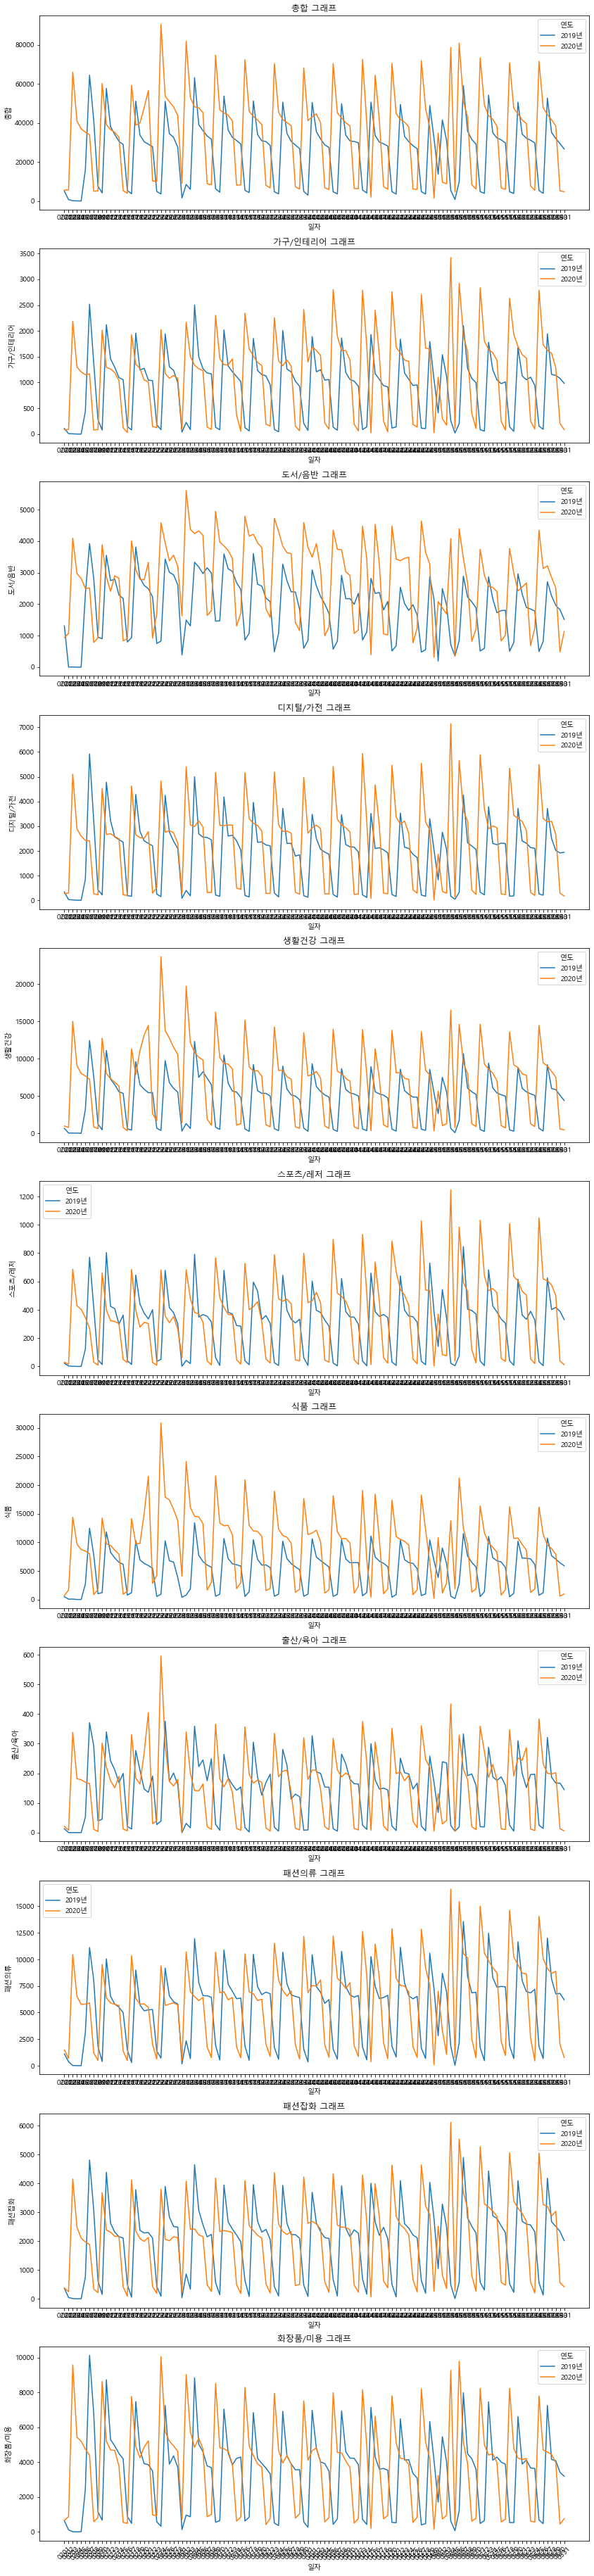

In [41]:
fig, axes = plt.subplots(nrows = 11)
fig.set_size_inches(14, 66)
stuff_list = ['총합', '가구/인테리어', '도서/음반', '디지털/가전', '생활건강',
              '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화',
              '화장품/미용']

for i in range(11) :
    plt.xticks(rotation = 45)
    sns.lineplot(x = stuff_dagu_day['날짜'], y = stuff_dagu_day[stuff_list[i]],
                 hue = stuff_dagu_day['연도'], data = stuff_dagu_day, ax = axes[i])
    axes[i].set(xlabel = '일자', ylabel = '{}'.format(stuff_list[i]), title = '{} 그래프'.format(stuff_list[i]))

#### 서울 19, 20년도 물류별 차이 그래프

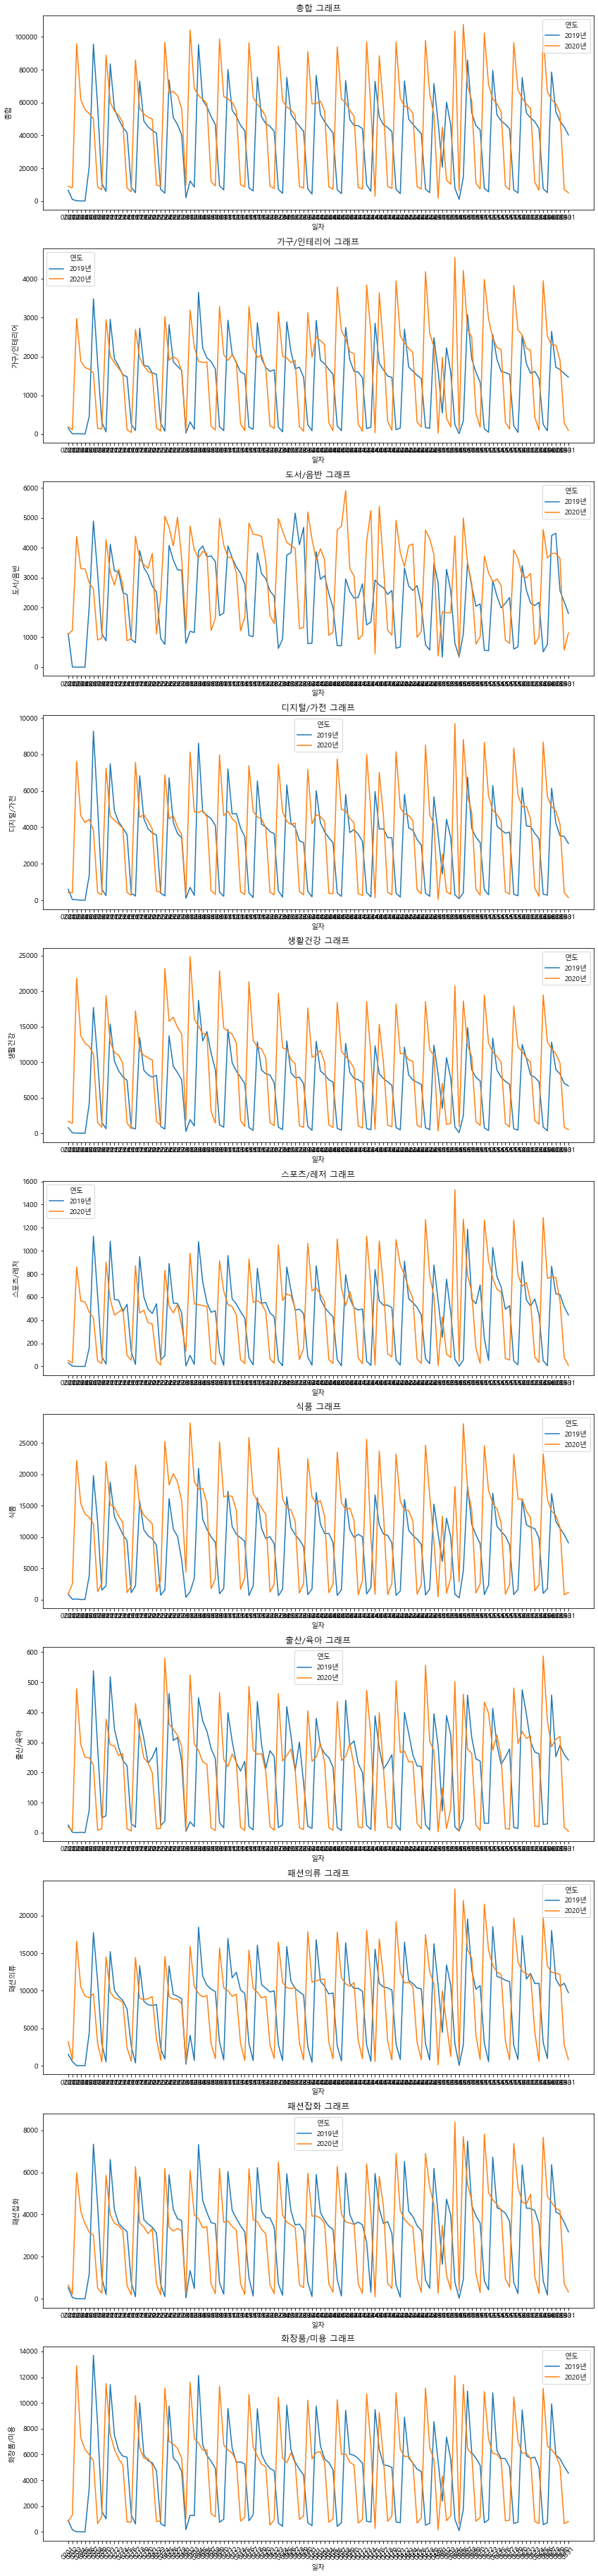

In [48]:
fig, axes = plt.subplots(nrows = 11)
fig.set_size_inches(14, 66)
stuff_list = ['총합', '가구/인테리어', '도서/음반', '디지털/가전', '생활건강',
              '스포츠/레저', '식품', '출산/육아', '패션의류', '패션잡화',
              '화장품/미용']

for i in range(11) :
    plt.xticks(rotation = 45)
    sns.lineplot(x = stuff_seoul_day['날짜'], y = stuff_seoul_day[stuff_list[i]],
                 hue = stuff_seoul_day['연도'], data = stuff_seoul_day, ax = axes[i])
    axes[i].set(xlabel = '일자', ylabel = '{}'.format(stuff_list[i]), title = '{} 그래프'.format(stuff_list[i]))

In [65]:
stuff_seoul_day

,날짜,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,연도,총합
0,0201,152,1123,599,819,31,843,25,1515,531,884,2019년,6522
1,0202,9,5,32,84,3,49,1,553,58,165,2019년,959
2,0203,10,2,30,44,0,84,0,13,5,17,2019년,205
3,0204,9,1,1,47,0,11,1,4,2,8,2019년,84
4,0205,3,0,2,18,0,17,0,1,0,7,2019년,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0527,2298,3805,5138,11926,774,14112,285,12451,4572,6376,2020년,61737
237,0528,2292,3808,4898,11211,768,13447,311,12320,4290,5953,2020년,59298
238,0529,1906,3638,4164,9887,566,11516,319,12163,4189,5131,2020년,53479
239,0530,290,567,421,864,75,756,18,2749,711,643,2020년,7094


###  2020년 서울, 대구 코로나 위험 수준에 따른 물류량 비교

#### 2020년 대구 코로나 위험 수준에 따른 물류량

In [49]:
stuff_dagu_day_20.head()

,날짜,가구/인테리어,도서/음반,디지털/가전,생활건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,위험정도,총합
0,0201,84,942,280,981,29,659,21,1479,378,668,주의,5521
1,0202,88,1071,287,798,15,1671,8,679,244,875,주의,5736
2,0203,2188,4093,5099,15005,686,14393,338,10451,4154,9580,주의,65987
3,0204,1302,2971,2891,9057,428,9688,182,6511,2484,5435,주의,40949
4,0205,1205,2813,2595,8013,403,8711,178,5768,2102,5206,주의,36994


In [75]:
stuff_dagu_day_20 = stuff_dagu_day_20[['날짜', '위험정도', '가구/인테리어', '도서/음반',
                                       '디지털/가전', '생활건강', '스포츠/레저', '식품',
                                       '출산/육아', '패션의류', '패션잡화', '화장품/미용', '총합']]

In [78]:
stuff_dagu_day_20 = pd.pivot_table(stuff_dagu_day_20, index = ['위험정도', '날짜'])

In [80]:
min_max_scaler = MinMaxScaler()
scaler_stuff_dagu_20 = min_max_scaler.fit_transform(stuff_dagu_day_20)

In [82]:
scaler_dagu = pd.DataFrame(scaler_stuff_dagu_20, columns = stuff_dagu_day_20.columns,
                          index = stuff_dagu_day_20.index)
scaler_dagu

가구/인테리어     도서/음반    디지털/가전      생활건강    스포츠/레저        식품  \
위험정도 날짜                                                                 
경계   0410  0.468548  0.512845  0.409703  0.301497  0.366559  0.341816   
     0417  0.699882  0.797884  0.653113  0.471544  0.590836  0.595152   
     0424  0.414756  0.593502  0.447420  0.302140  0.401929  0.325046   
     0504  0.044680  0.259917  0.037998  0.040185  0.057878  0.087338   
심각   0220  0.301587  0.464110  0.349832  0.550585  0.247588  0.483671   
...             ...       ...       ...       ...       ...       ...   
주의   0527  0.501764  0.532112  0.461441  0.390573  0.493569  0.364230   
     0528  0.470312  0.548734  0.442513  0.372003  0.484727  0.303612   
     0529  0.454145  0.479033  0.445878  0.341468  0.459807  0.283743   
     0530  0.370664  0.416509  0.371144  0.308702  0.399518  0.251052   
     0531  0.054380  0.032112  0.038418  0.010679  0.027331  0.012235   

                 총합     출산/육아      패션의류      패션잡화    화장품/미용  
위험정도 날짜                                                      
경계   0410  0.434378  0.335017  0.433822  0.398846  0.395646  
     0417  0.708450  0.511785  0.687152  0.648805  0.654641  
     0424  0.437993  0.291246  0.447203  0.392086  0.406732  
     0504  0.082931  0.065657  0.058731  0.048640  0.081125  
심각   0220  0.520688  0.449495  0.345846  0.318549  0.476872  
...             ...       ...       ...       ...       ...  
주의   0527  0.521373  0.388889  0.603294  0.528112  0.459035  
     0528  0.481277  0.333333  0.548317  0.519209  0.446841  
     0529  0.451070  0.329966  0.519920  0.463644  0.433639  
     0530  0.416272  0.336700  0.531545  0.490684  0.386174  
     0531  0.042498  0.018519  0.114737  0.082935  0.029830  

[120 rows x 11 columns]

In [84]:
scaler_dagu.reset_index(inplace = True)
scaler_dagu = pd.pivot_table(scaler_dagu, index =['위험정도'], aggfunc = 'mean').T
dagu = scaler_dagu[['주의', '경계', '위험', '심각']]
dagu

위험정도,주의,경계,위험,심각
가구/인테리어,0.353118,0.406966,0.388007,0.320727
도서/음반,0.402092,0.541037,0.482406,0.555204
디지털/가전,0.342930,0.387058,0.351995,0.340731
생활건강,0.266586,0.278842,0.293887,0.342347
스포츠/레저,0.326200,0.354301,0.309141,0.269146
식품,0.252170,0.337338,0.288609,0.365654
총합,0.365324,0.415938,0.386149,0.418360
출산/육아,0.273802,0.300926,0.249399,0.278007
패션의류,0.394720,0.406727,0.381595,0.332293
패션잡화,0.368334,0.372094,0.333647,0.317305


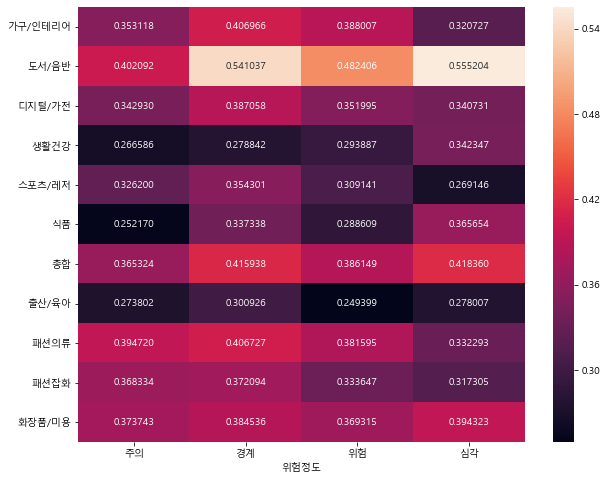

In [86]:
plt.figure(figsize = (10, 8))
sns.heatmap(dagu, annot = True, fmt = 'f')
plt.show()